# Исследовательский анализ данных

## Проект 13. Компьютерное зрение.

## Описание проекта и постановка задачи.

В этом уроке проведите исследовательский анализ набора данных в Jupyter. Затем скачайте свою тетрадь Jupyter Notebook.

Данные взяты с сайта ChaLearn Looking at People. Они находятся в папке /datasets/faces/.
В вашем распоряжении одна папка со всеми изображениями (/final_files) и csv-файл labels.csv с двумя колонками: file_name и real_age.
Извлечь данные из папки вам поможет новый метод ImageDataGenerator —flow_from_dataframe(dataframe, directory, ...).

Проведите исследовательский анализ данных:

    Посмотрите на размер выборки.
    Постройте график распределения возраста в выборке.
    Напечатайте на экране 10–15 фотографий и посмотрите, как устроен датасет.

Сделайте выводы о том, как результаты исследования повлияют на обучение модели.

## Подготовка

In [1]:
#pip install lightgbm

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#import warnings
import datetime

from IPython.display import display
#from scipy import stats as st

#from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression #, LinearRegression
from sklearn.tree import DecisionTreeClassifier #,DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
#from sklearn.ensemble import RandomForestRegressor #,RandomForestClassifier
#from sklearn.dummy import DummyRegressor#, DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import f1_score #, mean_squared_error, make_scorer, mean_absolute_error, r2_score, 
                                           #accuracy_score, f1_score, confusion_matrix, roc_auc_score

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image

In [3]:
#labels = pd.read_csv('https://code.s3.yandex.net/datasets/faces/labels.csv')
labels = pd.read_csv('/datasets/faces/labels.csv')

In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
file_name    7591 non-null object
real_age     7591 non-null int64
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [5]:
display(labels.sample(5))

,file_name,real_age
5479,005479.jpg,44
4425,004425.jpg,4
5557,005557.jpg,12
2337,002337.jpg,55
6783,006790.jpg,6


In [6]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


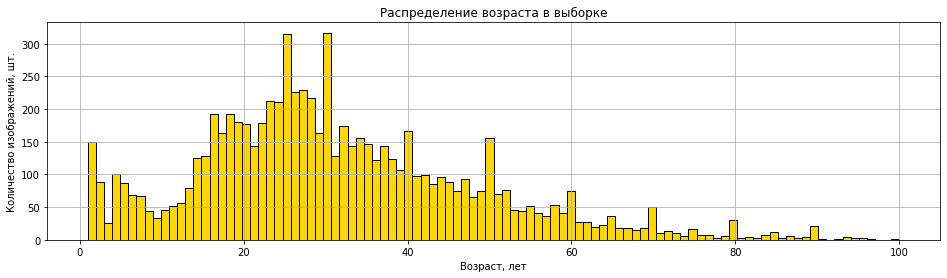

In [39]:
labels.hist(column='real_age', bins=100, figsize=(16, 4), color='gold', edgecolor = 'black')
plt.title("Распределение возраста в выборке")
plt.ylabel("Количество изображений, шт.")
plt.xlabel("Возраст, лет");

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe= labels
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


In [60]:
age = labels.loc[labels.loc[:, 'file_name'] == '004425.jpg']['real_age']
print(age)

4425    4
Name: real_age, dtype: int64


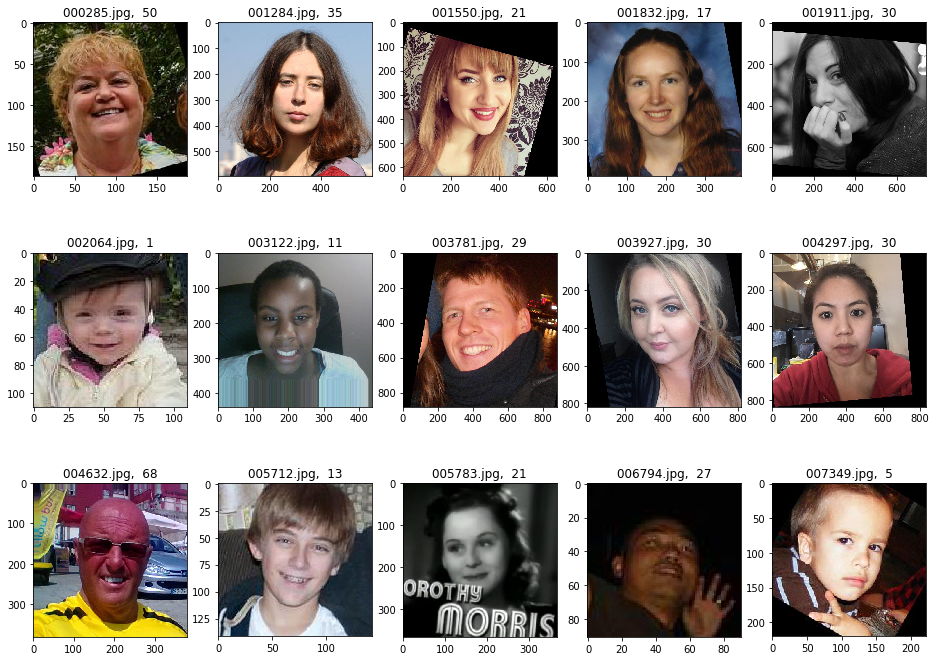

In [64]:
#labels.sample(5)
pictures = sorted(list(labels['file_name'].sample(15)))
pic_box = plt.figure(figsize=(16,12))

for i, name in enumerate(pictures):
    image = Image.open('/datasets/faces/final_files/'+name)
    age = labels.loc[labels.loc[:, 'file_name'] == str(name)]['real_age'].values[0]
    title = name + ',  ' + str(age)
    pic_box.add_subplot(3,5,i+1).set_title(title)
    plt.imshow(image)
plt.show()

Распределение по 'real_age' не равномерное. Мало данных для возраста 3, 8-12, 53-100. Вероятно модель неплохо обучится на озраст 16-35